# Pandas – Tools for data science in Python

"Pandas" is a portmanteau for "Panel Data" - data that you might think of as being in an Excel spreadsheet or in an R data frame (or tibble).

|  |  |  |  |
| --- | --- | --- | --- | 
|<img src="./assets/jnb021/Panda_Cub_from_Wolong,_Sichuan,_China.jpeg" alt="Drawing" style="width: 300px;"/> | <img src="./assets/jnb021/Panda_Cub_from_Wolong,_Sichuan,_China.jpeg" alt="Drawing" style="width: 300px;"/> | <img src="./assets/jnb021/Panda_Cub_from_Wolong,_Sichuan,_China.jpeg" alt="Drawing" style="width: 300px;"/> | <img src="./assets/jnb021/Panda_Cub_from_Wolong,_Sichuan,_China.jpeg" alt="Drawing" style="width: 300px;"/> |

Python was never intended as a language for data science. Rather, Python was meant to be a language whose users (i.e. us) could take in whatever direction they wished (in that egaletarian Pythonic fashion). Because it is such a fun language in which to program, it wasn't long before people that used R but had fallen in love with Python began writing modules to do R-like data science in Python. One of the best of these efforts is `pandas`.

#### A short history of Pandas.
Wes McKinney started developing what then became pandas while working at the capital management firm Applied Quantitative Research (AQR). Pandas was developed initially as a closed-source project and was made open source in 2009. Pandas is sponsored by [NumFOCUS, Inc.](https://numfocus.org/) that promotes support and sponsorships of python based open source code. 

Most importantly, pandas provides Python users (us) with a "data frame" container, which function almost exactly like a `DataFrame` or `tibble` object in R, in which the variables are in the columns, and each individual observation is a row. It also provides a couple of other useful objects: the `Series` object, which is a column vector (a 1D collection of numbers), and an `Index`, which uniquely identifies the rows of a `DataFrame` or `Series`.

## Pandas - Introduction to fundamental objects

`pandas` is the Python library that structures and simplifies data manipulation and analysis. The library represents data as tables (`DataFrames`) or 1D data series (`Series`), each of which comes with a sort of extra first column called an `Index`. 

  - `Series` - A mutable, one-dimensional array of indexed data.
  - `DataFrame` - A two-dimensional, size-mutable, data structure, similar to an R data frame or tibble.
  - `Index` -  An one-dimensional, immutable array of keys (or references) to rows of a `Series` or `DataFrame`.
  

Below we will learn a little bit more about these three data objects.

First, we'll import pandas and give it the nickname "pd". We can actually name it anything we want, but it's convention to name it `pd`. If we stick to this convention, our code will be more readable to others.

In [1]:
import pandas as pd

### The pandas `Series` object

A pandas `Series` is a one-dimensional column of values that comes with indexes to the values, kind of like a Python dictionary (`dict`). 

As a first example, let's define a pandas Series object and assign a set of string values to the elements of the object. We do this with pandas Series() function:

In [2]:
data = pd.Series(['a', 'b', 'c', 'd'])

After defining the object let's explore it.

In [3]:
print(data)

0    a
1    b
2    c
3    d
dtype: object


The data type is defined as `object`, the values we assigned are stored in the second column. The first column is the `Index` automatically assigned by pandas to each value. Having an index for each row is a foundamental data organization aspect of pandas. Values always have indexes, because pandas deals with panel data, i.e., tables. So even a one-dimensional array as a Series is assigned indices just like a table is.

We will discuss pandas index objects in further detail below.

A Pandas Series can be created directly by assigning values into a Python list (using `[]`), and that list to a series (`pd.Series()`). Yet, the final product of that series definition create something different than an list. It creates a set of pairs of values where a label (`index`) is associated to a corresponding value. 

Series are capable of holding data of any type (integer, string, float, python objects, etc.).  For example:

In [4]:
data = pd.Series(['string',10, True ,0.01])
print(data)

0    string
1        10
2      True
3      0.01
dtype: object


Once the Series object is created, the Index is created and it becomes part of the Series object. This means that the Index to the entries can be retrieved and used to address the corresponding entry. For example:

In [5]:
data[2]

True

The `index` column is actually a `property` of the `Series` - an object within an object, as we have encountered before.

We can look at the `index` using the dot notation of `object.property`:

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

We can also slice our Series object using the index column:

In [7]:
data[0:3]

0    string
1        10
2      True
dtype: object

So what's the big deal? Right now, we're thinking – snore - this is just like a Python list... 

However, in `pandas`, we can create a Series object by explictly assigning values and indices - in other words, we get to *name* the rows:

In [8]:
data1 = pd.Series(['string', 10, True, 0.01],index=[0,3,2,4])

print(data1)

0    string
3        10
2      True
4      0.01
dtype: object


Even though `data` and `data1` might look the same, they are not. The indices are different:

In [9]:
print(data.index)
print(data1.index)

RangeIndex(start=0, stop=4, step=1)
Int64Index([0, 3, 2, 4], dtype='int64')


So, that, if we address the second entry in either object we will get different values:

In [10]:
print(data[3])
print(data1[3])

0.01
10


One way to think about pandas Series objects is that they are dictionaries where a label is paired to a value, say `label 1` is assigned to `value 1`, or `label 2` to `value 3` etc. Indeed, a pandas Series object can be constructed by hand building a dictionary a set of pairing of labels and values. 

For example, let's build a [Python dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) of cognitive health. The dictionary pairs a label to a value: 

In [11]:
cognitive_health = {'happyness':10,
                    'language': 2, 
                    'energy': 5, 
                    'memory': 3}

Note that python dictionaries have attributes (you can type `cognitive_health.` and press `tab` twice to get a list of attributes), yet the python dictionary does not have `index` as an attribute. 

The following line will return an error.

In [12]:
cognitive_health.index

AttributeError: 'dict' object has no attribute 'index'

Python dictionaries can be used to set pandas Series directly:

In [13]:
cognitive_health_Series = pd.Series(cognitive_health)

The dictionary has been made into a panda Series and it is now ordered and labelled. So, the following operation will not return an error, but the labels of the Series (the indices):

In [14]:
cognitive_health_Series.index

Index(['happyness', 'language', 'energy', 'memory'], dtype='object')

Another important property that the pandas Series have and python dictionaries do not is the ability to allow slicing. Whereas, a dictionary would return an error if called as follows:

In [15]:
cognitive_health['happyness':'energy']

TypeError: unhashable type: 'slice'

A pandas `Series` does allow slicing, however, *even when the indexes are not consecutive integers*: 

In [16]:
cognitive_health_Series['happyness':'energy']

happyness    10
language      2
energy        5
dtype: int64

To summarize what we have learned about pandas Series:

 - They are ordered and labelled one-dimensional arrays.
 - They can be populated by assigning
  - values only (indeces are automatically assigned): `series = pd.Series(['a','b','c'])`
  - values and indices explicitly: `series = pd.Series(['a','b','c'],index = [1,3,2])`
  - python dictionaries directly: `dic = {1:'a',2:'b',3:'c'}`, `series = pd.Series(dic)` 
 - They always come with the property `index`

---

  - Use the cell below to create a `Pandas` `Series` containing the months of the year as labels (index) and their duration in months as values (use a dictionary to create the `Series`):

In [21]:
months={'Janurary': 1,
        'Feburary':2,
        'March':3,
        'April':4,
        'May':5,
        'June':6,
        'July':7,
        'August':8,
        'September':9,
        'October':10,
        'November':11,
        'December':12}
months_series=pd.Series(months)
print(months_series)

Janurary      1
Feburary      2
March         3
April         4
May           5
June          6
July          7
August        8
September     9
October      10
November     11
December     12
dtype: int64


 - Use the cell below to create a Pandas Series containing the months of the year as labels (index) and their duration in months as values (define index and values explicitly, or in other words do not use a dictionary to define the `Series`):

In [24]:
months_series1=pd.Series([1,2,3,4,5,6,7,8,9,10,11,12], index=['Janurary','Feburary','March','April','May','June','July','August','September','October','November','December'])
print(months_series1)

Janurary      1
Feburary      2
March         3
April         4
May           5
June          6
July          7
August        8
September     9
October      10
November     11
December     12
dtype: int64


---

### Pandas `DataFrame` objects

The `DataFrame` object is the workhorse of the library. DataFrames have effectively made pandas one of the core "go to" libraries for data science.

The DataFrame is an exstension of the Series object. It is a 2-dimensional table of data that is actually a collection of `Series` objects of the same length that each have their own name (the column label) and share a common row index. 

A DataFrame can be defined most simply by setting some values to it. The indexing and column labelling is automatically assigned by pandas. For example, we can create a one-dimensional list and assign the values of the list to a DataFrame:

In [25]:
my_list = ['a','b','c','d']
data_frame1 = pd.DataFrame(my_list)
print(data_frame1)

   0
0  a
1  b
2  c
3  d


Even though the result might seem very similar to that obtained about with the Series object, in reality, the DataFrame object has assigned not one but two labels, one label for the rows dimension (`[0:3]`) and one for the column dimension (`0`).

Indeed, we can notice from the `print()` output that two dimensions were automatically labelled (indexed) with numbers. Whereas the Series is created as a one-dimensional object, the DataFrame is created as a two-dimensional object.

Of course, the above is a silly data frame because it only has one column – that's what a `Series` object is for! So let's make a more exciting `DataFrame`.

In [26]:
# make a list of lists
data = [
    [1, 'Betty', 17],
    [2, 'Veronica', 18],
    [3, 'Archie', 18],
    [4, 'Jughead', 17]
]

In [27]:
# DataFrame from nested list with specified column names
df = pd.DataFrame(data, columns=['ID', 'Name', 'Age'])

In [28]:
df

,ID,Name,Age
0,1,Betty,17
1,2,Veronica,18
2,3,Archie,18
3,4,Jughead,17


How pretty! If we want a single column of data, we just ask for it by name:

In [29]:
df["Age"]

0    17
1    18
2    18
3    17
Name: Age, dtype: int64

We sort our table by the values in a column:

In [30]:
df.sort_values("Age")

,ID,Name,Age
0,1,Betty,17
3,4,Jughead,17
1,2,Veronica,18
2,3,Archie,18


In [31]:
df.sort_values("Name")

,ID,Name,Age
2,3,Archie,18
0,1,Betty,17
3,4,Jughead,17
1,2,Veronica,18


Let's make another data frame, on that contains all numbers:

In [32]:
data = [
    [1, 22, 3, 4, 5],
    [10, 17, 8, 7, 6],
    [11, 12, 13, 14, 15],
    [16, 9, 18, 19, 20],
    [21, 2, 23, 24, 25]
]

# Creating the DataFrame
columns = ['A', 'B', 'C', 'D', 'E']
df2 = pd.DataFrame(data, columns=columns)

print("Numerical DataFrame:")

df2

Numerical DataFrame:


,A,B,C,D,E
0,1,22,3,4,5
1,10,17,8,7,6
2,11,12,13,14,15
3,16,9,18,19,20
4,21,2,23,24,25


Now, using the various methods that `DataFrame` objects have, we can compute stuff, like the mean and standard deviation of each column:

In [33]:
df2.mean()

A    11.8
B    12.4
C    13.0
D    13.6
E    14.2
dtype: float64

In [34]:
df2.std()

A    7.463243
B    7.635444
C    7.905694
D    8.264381
E    8.700575
dtype: float64

---

Use our trick of typing `df2.` and hitting the tab key to see the list of available methods. Now try one!

<Axes: >

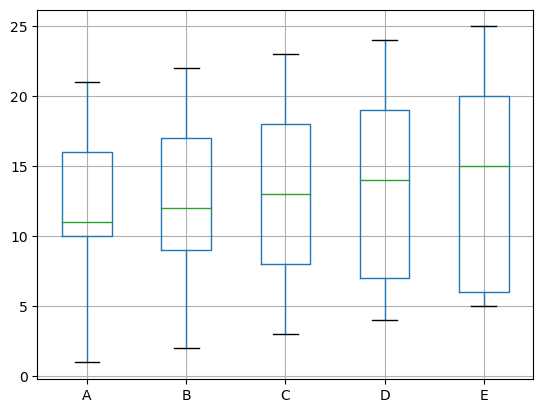

In [36]:
df2.boxplot()

---

What happens if you try to compute the `.mean()` of the Archie `df`?

In [45]:
df["Name"=="Archie"].mean()

KeyError: False

Now see if you can figure out how to compute the mean of Age column:

In [43]:
df["Age"].mean()

17.5

---

As mentioned above, nother way to think about a DataFrame is that it is a sequence of *aligned* Series objects. What do we mean by that?

Each column in the DataFrame can be thought of as a Series. Each series is labelled by the column index. Importantly, however, the series are *aligned*, this means that the set of Series (the columns of the DataFrame) are indexed by a common `Index` object.

Let's take a look at all this.

Let's construct a new Series object similar to `cognitive_health_Series`, the object we created above (make sure that object is still in memeory, if needed re-run that section of the cells). Let's assume that that original series represented the data collected on a subject.

In [46]:
cognitive_health_Series

happyness    10
language      2
energy        5
memory        3
dtype: int64

The new Series will represent data on a second subject. To build the series we will use steps similar to the ones used above. We will first make a python dictionary and then make a pandas Series object out of it.

In [47]:
cognitive_health_subject2_dict = {'happyness': 15,
                                  'language': 4, 
                                  'energy': 9, 
                                  'memory': 6}
cognitive_health_subject2_series = pd.Series(cognitive_health_subject2_dict)
cognitive_health_subject2_series

happyness    15
language      4
energy        9
memory        6
dtype: int64

Now that we have two pandas Series, we can construct a pandas DataFrame by combining the two Series objects. 

To do so, we will first create a single dictionary containing the two series, labelled as `subject 1` and `subject 2` and then use that dictionary to make a DataFrame.

The dictionary for the DataFrame is formed by assigning each subject to a label:

In [48]:
dict = {'subject 1' : cognitive_health_Series, 
        'subject 2' : cognitive_health_subject2_series}
print(dict)

{'subject 1': happyness    10
language      2
energy        5
memory        3
dtype: int64, 'subject 2': happyness    15
language      4
energy        9
memory        6
dtype: int64}


The dictionary can now be used to build a DataFrame:

In [49]:
sample = pd.DataFrame(dict)
sample

,subject 1,subject 2
happyness,10,15
language,2,4
energy,5,9
memory,3,6


Excellent. Pandas did its Kung Fu. The dictionary comprising two pandas Series, was organized into a pandas DataFrame.

Next try adding two more subjects to the same DataFrame (`sample`). Let's practice this with a subject that has all values higher than subject 2 by a value of 3 (just add 3) and another subject that has all values lower than subject 2 by a value of 2 (just subtract 3).

In [50]:
cognitive_health_subject3_dict = {'happyness': 15+3,
                                  'language': 4+3, 
                                  'energy': 9+3, 
                                  'memory': 6+3}
cognitive_health_subject3_series = pd.Series(cognitive_health_subject3_dict)
cognitive_health_subject3_series

happyness    18
language      7
energy       12
memory        9
dtype: int64

In [51]:
cognitive_health_subject4_dict = {'happyness': 15-2,
                                  'language': 4-2, 
                                  'energy': 9-2, 
                                  'memory': 6-2}
cognitive_health_subject4_series = pd.Series(cognitive_health_subject4_dict)
cognitive_health_subject4_series

happyness    13
language      2
energy        7
memory        4
dtype: int64

In [52]:
dict = {'subject 1' : cognitive_health_Series, 
        'subject 2' : cognitive_health_subject2_series, 
        'subject 3' : cognitive_health_subject3_series,
        'subject 4' : cognitive_health_subject4_series,
       }
print(dict)

{'subject 1': happyness    10
language      2
energy        5
memory        3
dtype: int64, 'subject 2': happyness    15
language      4
energy        9
memory        6
dtype: int64, 'subject 3': happyness    18
language      7
energy       12
memory        9
dtype: int64, 'subject 4': happyness    13
language      2
energy        7
memory        4
dtype: int64}


In [53]:
sample = pd.DataFrame(dict)
sample

,subject 1,subject 2,subject 3,subject 4
happyness,10,15,18,13
language,2,4,7,2
energy,5,9,12,7
memory,3,6,9,4


In [54]:
sample.isna()

,subject 1,subject 2,subject 3,subject 4
happyness,False,False,False,False
language,False,False,False,False
energy,False,False,False,False
memory,False,False,False,False


The newly created DataFrame has various attributes that we can explore. We can address and extract the columns for example:

In [56]:
cols = sample.columns
print(cols)

Index(['subject 1', 'subject 2', 'subject 3', 'subject 4'], dtype='object')


We can address the rows, which in technical terms are called the labels or the index:

In [57]:
rows = sample.index
print(rows)

Index(['happyness', 'language', 'energy', 'memory'], dtype='object')


---

  - Use the cell below to create a Pandas `DataFrame`. Each column of the DataFrame should be the title of song you pick (it is fine to clip the title tothe first 4 words in the title). Each row of the data frame should be the name of one of your colleagues, use 3-4 names. Interview 3-4 of your colleagues and add the value in each cell representing the rating of the corresponding song that each colleague provides using a scale between 0-5, where 5 is an awesome song and 0 is a boring song.

  - Use the cell below to create a Pandas `DataFrame`. Each column of the DataFrame should be the name of an band/singer of your pick (it is fine to clip the title tothe first 4 words in the title). Each row of the data frame should be the name of one of your colleagues, use 3-4 names. Interview 3-4 of your colleagues and add the value in each cell representing the rating of the corresponding song that each colleague provides using a scale between 0-5, where 5 is an awesome song and 0 is a boring song.

---

### Pandas `index` object

Let's briefly discuss the `index` object in pandas. 

An `Index` is the pandas object that identifies the rows in `Series` and `DataFrames`. You can think of it as a set of "handles" that that let you grab one or more rows of a `Series` or `DataFrame`.

Pandas `Index` objects are immutable, so once an Index is defined, the values inside the index cannot be changed.

Whereas `Series` (or `DataFrame`) containers can be modified after definition, a pandas `index` cannot. Let's try this. Above we defined `ind` as a pandas `index` and set in the third position the value `3`. 

In [58]:
ind

NameError: name 'ind' is not defined

Let's try to change that value, evaluate the following operation in which we attempt to set the value `10` in the third position of `ind`:

In [59]:
ind[2] = 10

NameError: name 'ind' is not defined

Pandas `Index` objects are designed to facilitate operations on the array and serve the task of keeping track of positions of data entries in the objects. 

They support and facilitiate operations such as joining datasets. Because of this the pandas index object follows many operations of the built in python datatype [`set`](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).

Because of this the Index object allows many of operations also served by Python set data structure, such as unions, intersections, differences, and other combinations can be computed in a familiar way.

For example, two pandas index object can be united. This means that the unique indices are combined:

In [60]:
index1 = pd.Index([1, 2, 3, 4, 5])
index2 = pd.Index([1, 3, 4, 6, 20])

index1.union(index2) 

Int64Index([1, 2, 3, 4, 5, 6, 20], dtype='int64')

Other logical operations can be performed using pandas index objects, for example intersection (find the common elements):

In [61]:
index1.intersection(index2)  

Int64Index([1, 3, 4], dtype='int64')

In [62]:
myseries = pd.Series([1,3,4,6,2,8])
myseries[index1.intersection(index2)]

1    3
3    6
4    2
dtype: int64

In sum, pandas index objects allow performing slicing, indexing operations and facilitate keeping track of, ahem, the indices.

---

  - Use the cell below to create two `Pandas` `Series`. The first Series should be called `PandasSeriesOne` contain titles of five songs from your favourite artist as indices and their respective duration (it is fine to only write the first four words of the title). The second Series should be called `PandasSeriesTwo` and contain the songs of your colleague sitting to your right (or left if no one sites to your right) favourite artist as indices and their correspdoning duration as value. 

  - Use the cell below to find the duration of the songs you and your colleague have in common.

### Summary

We have learned about the library `pandas` and the three fundamental objects of the library:

 - Series
 - DataFrames
 - Index
 
The first two are the objects that hold our data. The `DataFrame` is a 2-dimensional object composed of one-dimensional `Series` objects. The `Series` objects in a DataFrame are "aligned", meaning that all the `Series` (columns) are indexed by the same `Index` object. 

In "tidy data" terms, each column of a `DataFrame` should correspond to a variable, and each row should correspond to an "observation". So, for example, we might have 4 measurements (e.g. height, weight, BME, blood pressure) on a number of patients from a health clinic. In this case, we would make each patient be an "observation" and each column would contain a single variable, the kind of measurement. The pandas `DataFrame` object would easily allow us to compute, for example, the mean and stadard deviation of each measurement.

---

To practice with pandas `Series` and `DataFrames`, build a new dataset in which

* each row is a city (pick your 4 favorite cities, or 2 favorites and 2 least favorites)
* there are columns for
    - average high, summer
    - average low, summer
    - average high, winter
    - average low, winter

---